## import할 모듈

In [2]:
#-*- coding: utf-8 -*-
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy
import os
import pandas as pd
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## CSV 파일 읽어오기, seed 값 설정

In [3]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
df = pd.read_csv("creditcard.csv")

## 첫번째 = 아무런 처리 없이 학습, 예측

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


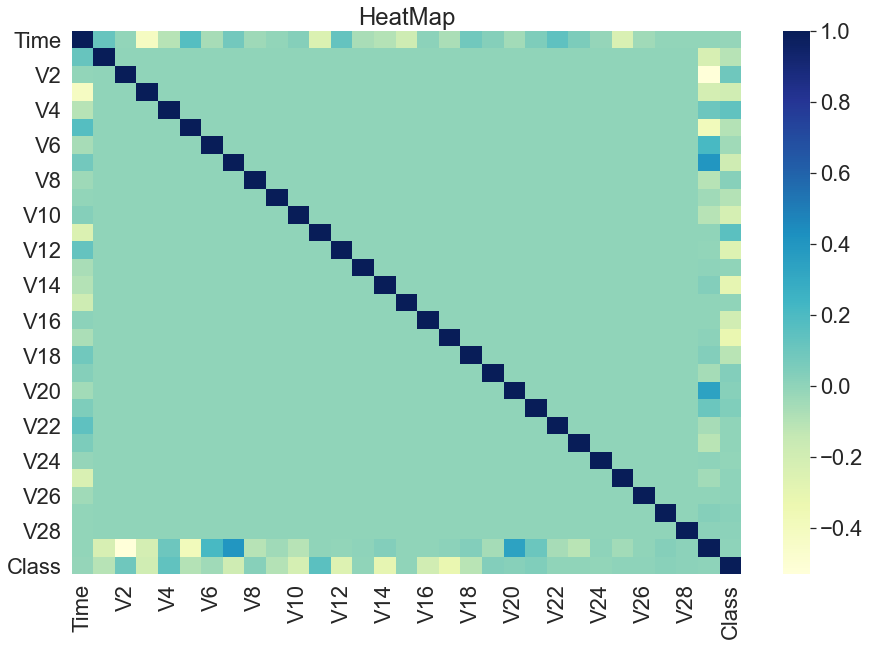

In [6]:
df_corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu")
sns.set(font_scale=2, style='white')

plt.title('HeatMap')
plt.show()

In [4]:
print('데이터 세트 Null 값 갯수 \n',df.isnull().sum())

데이터 세트 Null 값 갯수 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## CSV 데이터 종속, 독립 변수 분할

In [5]:
dataset = df.values     #읽어온 데이터를 분할하기위해 다시 변환
X = dataset[:,1:30]     #독립변수
Y = dataset[:,30]       #종속변수
#훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=3)    #test_size가 전체의 15%

#### 아래에서 input_dim을 바꾸지 않고 사용해서 에러가 계속 생겼었음

In [6]:
#모델 구조 생성 Dense 값들은 그냥 아무렇게나 준 것
model = Sequential()
model.add(Dense(30,  input_dim=29, activation='relu'))    #학습에 사용될 데이터의 열이 29개 이므로 input_dim을 29로 줌
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))    #최종 결과가 0아니면 1인 이진 분류이므로 sigmoid 사용

## 모델 컴파일 및 학습

In [7]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
MODEL_DIR = './credit_model/'    #향후 다시 모델 사용할 때를 위한 모델 저장경로

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience = 20) 
#한 번 학습에 시간이 오래 걸리기 때문에 중간 정지하는 patience를 20만 줘서 빨리 학습이 중단되도록 설정

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=100, callbacks = [early_stopping_callback,checkpointer])
#epoch와 batch_size또한 학습 시간을 줄이기 위해 epoch는 줄이고 batch_size는 늘림

Epoch 1/100
1937/1937 [==============================] - 5s 2ms/step - loss: 0.0652 - accuracy: 0.9895 - precision: 0.1762 - recall: 0.3257 - val_loss: 0.0253 - val_accuracy: 0.9987 - val_precision: 0.8077 - val_recall: 0.4516

Epoch 00001: val_loss improved from inf to 0.02526, saving model to ./model\01-0.0253.hdf5
Epoch 2/100
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0084 - accuracy: 0.9994 - precision: 0.8535 - recall: 0.7549 - val_loss: 0.0078 - val_accuracy: 0.9993 - val_precision: 0.8625 - val_recall: 0.7419

Epoch 00002: val_loss improved from 0.02526 to 0.00775, saving model to ./model\02-0.0078.hdf5
Epoch 3/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0079 - accuracy: 0.9993 - precision: 0.8035 - recall: 0.7033 - val_loss: 0.0077 - val_accuracy: 0.9993 - val_precision: 0.8659 - val_recall: 0.7634

Epoch 00003: val_loss improved from 0.00775 to 0.00769, saving model to ./model\03-0.0077.hdf5
Epoch 4/100
1937/1937 [============

## 모델의 테스트 데이터에 대한 정확도, 정밀도, 재현율

In [8]:
print(model.evaluate(X_test, Y_test))
#학습한 모델로 테스트 정확도 측정

1336/1336 [==============================] - 1s 891us/step - loss: 0.0038 - accuracy: 0.9996 - precision: 0.9138 - recall: 0.7910
[0.0037934519350528717, 0.9995552897453308, 0.9137930870056152, 0.7910447716712952]


## 모델의 전체 데이터에 대한 정밀도, 재현율

In [9]:
predict = model.predict(X)    #predict만 사용한 후 for문을 사용해 직접 Y의 답과 비교
#예측에 X_test 말고 X를 사용한 이유는 사기인 경우가 너무 적어서 X_test에 거의 안들어 갈 수 있다 생각했기 때문

In [10]:
for i in range(10):
    print('%.10f' % predict[i], Y[i])

0.0000064242 0.0
0.0000131042 0.0
0.0000187419 0.0
0.0000000069 0.0
0.0000125426 0.0
0.0000132772 0.0
0.0000412988 0.0
0.0000008584 0.0
0.0000000538 0.0
0.0000070404 0.0


#### 임의로 predict값이 0.5 보다 높으면 1로 아니면 0으로 예측한 것이라 판단하여 정밀도, 재현율을 측정

In [11]:
tp = 0
fp = 0
tn = 0
fn = 0
for index, i in enumerate(Y):
    if i == 1.0:
        if (predict[index] > 0.5):
            tp += 1
        else :
            fn += 1
    else:
        if (predict[index] > 0.5):
            fp += 1
        else :
            tn += 1
print(tp, fp, tn, fn)

400 15 284300 92


In [12]:
print("precision =\t", tp / (tp + fp))
print("recall =\t", tp / (tp + fn))

precision =	 0.963855421686747
recall =	 0.8130081300813008


## 정확도와 val_loss 시각화

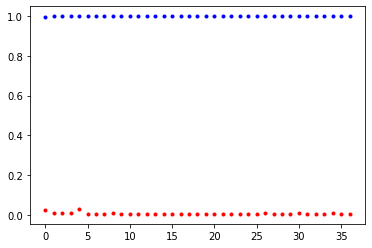

In [13]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = numpy.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()    #epoch를 100번만 줘서 별로 많이 나타자니는 않고 그마저도 거의 100%에 가까운 정확도를 보임

## 데이터 중 Amount를 정규화 한 경우

In [4]:
scaler= MinMaxScaler()    #정규화를 위해 MinMaxScaler를 호출
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))    #이 메소드로 정규화 실행, reshape의 파라미터는 무슨 역할인지 까먹음

In [15]:
df    #Amount가 정규화 된 것을 확인

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0


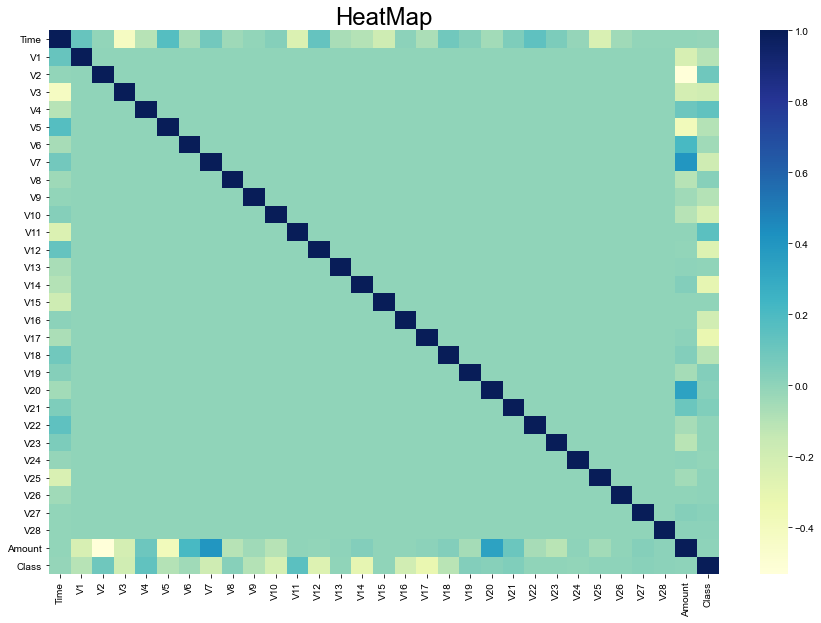

In [5]:
df_corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu")
sns.set(font_scale=2, style='white')

plt.title('HeatMap')
plt.show()

In [16]:
#CSV 데이터 종속, 독립 변수 분할
dataset = df.values
X = dataset[:,1:30]

Y = dataset[:,30]       #종속변수
#훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=3)

In [17]:
#모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
MODEL_DIR = './credit_model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience = 20)

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=100, callbacks = [early_stopping_callback,checkpointer])

Epoch 1/100
1937/1937 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 0.9995 - precision: 0.9275 - recall: 0.8054 - val_loss: 0.0038 - val_accuracy: 0.9993 - val_precision: 0.9839 - val_recall: 0.6559

Epoch 00001: val_loss improved from inf to 0.00382, saving model to ./model\01-0.0038.hdf5
Epoch 2/100
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0017 - accuracy: 0.9996 - precision: 0.9224 - recall: 0.8128 - val_loss: 0.0036 - val_accuracy: 0.9994 - val_precision: 0.9114 - val_recall: 0.7742

Epoch 00002: val_loss improved from 0.00382 to 0.00365, saving model to ./model\02-0.0036.hdf5
Epoch 3/100
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0018 - accuracy: 0.9996 - precision: 0.9080 - recall: 0.7894 - val_loss: 0.0038 - val_accuracy: 0.9995 - val_precision: 0.9048 - val_recall: 0.8172

Epoch 00003: val_loss did not improve from 0.00365
Epoch 4/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.

## 모델의 테스트 데이터에 대한 정확도, 정밀도, 재현율

In [18]:
print(model.evaluate(X_test, Y_test))

1336/1336 [==============================] - 1s 868us/step - loss: 0.0052 - accuracy: 0.9994 - precision: 0.8525 - recall: 0.7761
[0.005199139472097158, 0.9994382262229919, 0.8524590134620667, 0.7761194109916687]


## 모델의 전체 데이터에 대한 정밀도, 재현율

In [19]:
predict = model.predict(X)

In [20]:
for i in range(10):
    print('%.10f' % predict[i], Y[i])

0.0000000607 0.0
0.0000000627 0.0
0.0000000072 0.0
0.0000006693 0.0
0.0000001891 0.0
0.0000791729 0.0
0.0002757609 0.0
0.0000000023 0.0
0.0000000335 0.0
0.0000248228 0.0


In [21]:
tp = 0
fp = 0
tn = 0
fn = 0
for index, i in enumerate(Y):
    if i == 1.0:
        if (predict[index] > 0.5):
            tp += 1
        else :
            fn += 1
    else:
        if (predict[index] > 0.5):
            fp += 1
        else :
            tn += 1
print(tp, fp, tn, fn)

421 31 284284 71


In [22]:
print("precision =\t", tp / (tp + fp))
print("recall =\t", tp / (tp + fn))

precision =	 0.9314159292035398
recall =	 0.8556910569105691


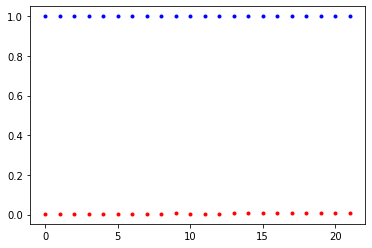

In [23]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = numpy.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()

## 데이터 정규화 후 셔플로 데이터를 섞음

In [24]:
df = df.sample(frac = 1)    #섞을 때 사용하는 메소드

In [25]:
df    #섞인거 확인

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0.001557,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0.000077,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0.003737,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0.011989,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0.000195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,0.001942,0
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,0.000973,0
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,0.001358,0
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,0.006668,0


In [26]:
#CSV 데이터 종속, 독립 변수 분할
dataset = df.values
X = dataset[:,1:30]

Y = dataset[:,30]       #종속변수
#훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=3)

In [27]:
#모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
MODEL_DIR = './credit_model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience = 20)

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=100, callbacks = [early_stopping_callback,checkpointer])

Epoch 1/100
1937/1937 [==============================] - 4s 2ms/step - loss: 0.0022 - accuracy: 0.9997 - precision: 0.9356 - recall: 0.8630 - val_loss: 0.0041 - val_accuracy: 0.9995 - val_precision: 0.9620 - val_recall: 0.7755

Epoch 00001: val_loss improved from inf to 0.00406, saving model to ./model\01-0.0041.hdf5
Epoch 2/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9997 - precision: 0.9738 - recall: 0.8540 - val_loss: 0.0042 - val_accuracy: 0.9994 - val_precision: 0.9859 - val_recall: 0.7143

Epoch 00002: val_loss did not improve from 0.00406
Epoch 3/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 0.9997 - precision: 0.9620 - recall: 0.8335 - val_loss: 0.0043 - val_accuracy: 0.9995 - val_precision: 0.9865 - val_recall: 0.7449

Epoch 00003: val_loss did not improve from 0.00406
Epoch 4/100
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0013 - accuracy: 0.9997 - precision: 0.9712 

## 모델의 테스트 데이터에 대한 정확도, 정밀도, 재현율

In [28]:
print(model.evaluate(X_test, Y_test))

1336/1336 [==============================] - 1s 836us/step - loss: 0.0027 - accuracy: 0.9996 - precision: 0.9492 - recall: 0.8116
[0.0026736303698271513, 0.9996255040168762, 0.9491525292396545, 0.8115941882133484]


## 모델의 전체 데이터에 대한 정밀도, 재현율

In [29]:
predict = model.predict(X)

In [30]:
for i in range(10):
    print('%.10f' % predict[i], Y[i])

0.0000007855 0.0
0.0000001404 0.0
0.0000000000 0.0
0.0000000340 0.0
0.0000000043 0.0
0.0000000640 0.0
0.0000000019 0.0
0.0000028547 0.0
0.0000000000 0.0
0.0000072088 0.0


In [31]:
tp = 0
fp = 0
tn = 0
fn = 0
for index, i in enumerate(Y):
    if i == 1.0:
        if (predict[index] > 0.5):
            tp += 1
        else :
            fn += 1
    else:
        if (predict[index] > 0.5):
            fp += 1
        else :
            tn += 1
print(tp, fp, tn, fn)

406 19 284296 86


In [32]:
print("precision =\t", tp / (tp + fp))
print("recall =\t", tp / (tp + fn))

precision =	 0.9552941176470588
recall =	 0.8252032520325203


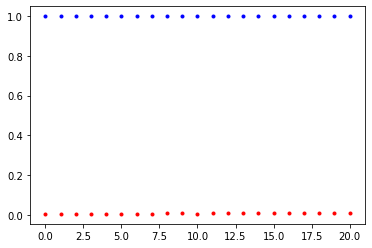

In [33]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = numpy.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()